In [1]:
# Nạp các gói thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
# Đọc tập tin json chứa tập dữ liệu iris
iris = pd.read_json('https://raw.githubusercontent.com/ltdaovn/dataset/master/iris.json')
print('Dataset info:\n', iris.info) 
X = iris.drop(columns=['species']) 
y = iris.species
# Sử dụng nghi thức kiểm tra hold-out
# Chia dữ liệu ngẫu nhiên thành 2 tập dữ liệu con:
# training set và test set theo tỷ lệ 70/30
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
#print(X_train.shape, y_train.shape)

Dataset info:
 &lt;bound method DataFrame.info of      sepalLength  sepalWidth  petalLength  petalWidth    species
0            5.1         3.5          1.4         0.2     setosa
1            4.9         3.0          1.4         0.2     setosa
2            4.7         3.2          1.3         0.2     setosa
3            4.6         3.1          1.5         0.2     setosa
4            5.0         3.6          1.4         0.2     setosa
..           ...         ...          ...         ...        ...
145          6.7         3.0          5.2         2.3  virginica
146          6.3         2.5          5.0         1.9  virginica
147          6.5         3.0          5.2         2.0  virginica
148          6.2         3.4          5.4         2.3  virginica
149          5.9         3.0          5.1         1.8  virginica

[150 rows x 5 columns]&gt;


Do chinh xac cua mo hinh voi nghi thuc kiem tra hold-out: 0.933


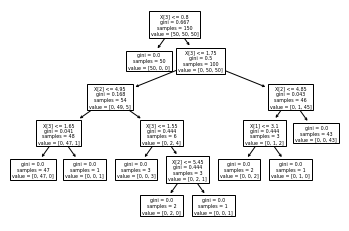

In [2]:
#print(X_test.shape, y_test.shape)
# Xây dựng mô hình với giải thuật Cây quyết định 
model = tree.DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)
# Dự đoán nhãn tập kiểm tra 
y_pred = model.predict(X_test) 
#print(y_pred)
# Tính độ chính xác
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" % accuracy_score(y_test, y_pred))
# Hiển thị cây 
tree.plot_tree(model.fit(X, y)) 
plt.show()

In [3]:
def load_datasets(name):
    if name == 'Iris':
        data = datasets.load_iris()
    elif name == 'Breast Cancer':
        data = datasets.load_breast_cancer()
    elif name == 'Wine':
        data = datasets.load_wine()
    elif name == 'Handwritten Digits':
        data = datasets.load_digits()
    df = pd.DataFrame(data.data)
    y = data.target
    return df, y

In [6]:
def score_dataset(dataset_name, model, X, y, cv=None):
    if cv:
        scores = cross_val_score(model, df, y, cv=cv)
        print("%s %2d-folds = %.3f" % (dataset_name, cv, np.mean(scores)))
    else:
        for nFold in range(2, 10+1):
            scores = cross_val_score(model, df, y, cv=nFold)
            print("%s %2d-folds = %.3f" % (dataset_name, nFold, np.mean(scores)))
    tree.plot_tree(model.fit(X, y)) 
    plt.show()

Breast Cancer  5-folds = 0.933


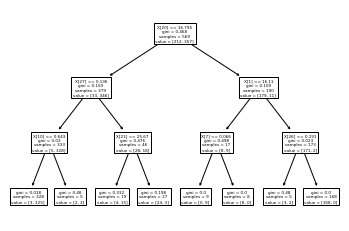

In [20]:
dataset_name = 'Breast Cancer'
df, y = load_datasets(dataset_name)
model = tree.DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=5)
score_dataset(dataset_name, model, df, y, cv=5)

Wine  5-folds = 0.860


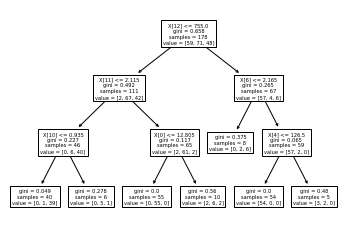

In [19]:
dataset_name = 'Wine'
df, y = load_datasets(dataset_name)
model = tree.DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=5)
score_dataset(dataset_name, model, df, y, cv=5)

Handwritten Digits  5-folds = 0.433


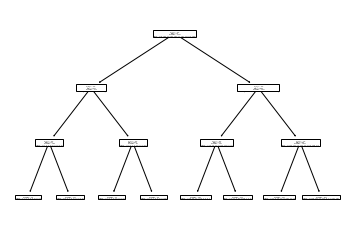

In [18]:
dataset_name = 'Handwritten Digits'
df, y = load_datasets(dataset_name)
model = tree.DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=5)
score_dataset(dataset_name, model, df, y, cv=5)